# Data Exploration



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sample_20 = pd.read_csv('/content/drive/MyDrive/Datasets/train_merged_05.csv')

In [ ]:
sample_20.head(5)

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,2017-03-11,0.374606,0.033519,0.044293,1.008622,0.001470,0.459235,0.002339,0.006168,...,NaN,NaN,0.008263,0.006609,0.007370,NaN,0.007171,0.005120,0.007513,0
1,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,2017-04-22,0.414269,0.002516,0.059667,0.123964,0.004374,0.434148,0.001405,0.052130,...,NaN,NaN,0.001986,0.004050,0.000796,NaN,0.001802,0.002364,0.003987,0
2,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,2017-05-12,0.413310,0.003285,0.053418,0.304955,0.002316,0.415906,0.009388,0.048780,...,NaN,NaN,0.009515,0.008757,0.009219,NaN,0.003134,0.001686,0.001265,0
3,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,2017-06-10,0.328983,0.038574,0.049463,0.115654,0.004654,0.416112,0.003223,0.081001,...,NaN,NaN,0.002524,0.007841,0.007421,NaN,0.000728,0.003591,0.007998,0
4,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,2017-07-19,0.496989,0.005552,0.041452,0.133631,0.007363,0.419864,0.003393,0.098308,...,NaN,NaN,0.003823,0.009599,0.006957,NaN,0.008746,0.007101,0.006658,0


In [ ]:
sample_20.shape

(277266, 191)

In [ ]:
sample_20['customer_ID'].nunique()

22946

In [ ]:
sample_20.dtypes

customer_ID     object
S_2             object
P_2            float64
D_39           float64
B_1            float64
                ...   
D_142          float64
D_143          float64
D_144          float64
D_145          float64
target           int64
Length: 191, dtype: object

convert S_2 to Datetime

In [ ]:
sample_20['S_2'] = pd.to_datetime(sample_20['S_2'])

In [ ]:
sample_20['customer_ID'] = sample_20['customer_ID'].astype(object)

## Store Data Types

In [ ]:
sample_data_types = pd.DataFrame(sample_20.dtypes)
#sample_data_types.to_csv('/content/drive/MyDrive/Datasets/train_data_types.csv')

3 Features are objects

In [ ]:
sample_20.dtypes[sample_20.dtypes == "object"]

customer_ID    object
D_63           object
D_64           object
dtype: object

In [ ]:
sample_20['D_63'].unique()

array(['CO', 'CR', 'CL', 'XL', 'XM', 'XZ'], dtype=object)

## One Hot Encoding

### Sample Data Encoding

In [ ]:
categorical_variables = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
enc = OneHotEncoder(sparse = False)

In [ ]:
encoded_data = enc.fit_transform(sample_20[categorical_variables])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
sample_encoded = pd.DataFrame(encoded_data, columns = enc.get_feature_names_out(categorical_variables))

sample_encoded.shape

(277266, 55)

In [ ]:
sample_encoded.head

<bound method NDFrame.head of         B_30_0.0  B_30_1.0  B_30_2.0  B_30_nan  B_38_1.0  B_38_2.0  B_38_3.0  \
0            1.0       0.0       0.0       0.0       1.0       0.0       0.0   
1            1.0       0.0       0.0       0.0       1.0       0.0       0.0   
2            1.0       0.0       0.0       0.0       1.0       0.0       0.0   
3            1.0       0.0       0.0       0.0       1.0       0.0       0.0   
4            1.0       0.0       0.0       0.0       1.0       0.0       0.0   
...          ...       ...       ...       ...       ...       ...       ...   
277261       0.0       1.0       0.0       0.0       0.0       0.0       0.0   
277262       0.0       1.0       0.0       0.0       0.0       0.0       0.0   
277263       0.0       1.0       0.0       0.0       0.0       0.0       0.0   
277264       1.0       0.0       0.0       0.0       0.0       0.0       0.0   
277265       1.0       0.0       0.0       0.0       0.0       0.0       0.0   

        B

In [ ]:
sample_20 = sample_20.join(sample_encoded)

In [ ]:
sample_20['B_30_0.0'].head(5)

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: B_30_0.0, dtype: float64

In [ ]:
sample_20.drop(['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68'], axis=1, inplace=True)

In [ ]:
sample_20.shape

(277266, 235)

#Feature Engineering



In [ ]:
#Categorical variables:
#category_count = df['B_30'].value_counts()
#category_percentages = df['Category'].value_counts(normalize=True) * 100

# [P_2, B_1, D_44, B_2]

In [ ]:
sample_20 = sample_20.set_index('S_2')
sample_20.head()

,customer_ID,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,...,D_66_1.0,D_66_nan,D_68_0.0,D_68_1.0,D_68_2.0,D_68_3.0,D_68_4.0,D_68_5.0,D_68_6.0,D_68_nan
S_2,,,,,,,,,,,,,,,,,,,,,
2017-03-11,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0.374606,0.033519,0.044293,1.008622,0.001470,0.459235,0.002339,0.006168,0.152932,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2017-04-22,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0.414269,0.002516,0.059667,0.123964,0.004374,0.434148,0.001405,0.052130,0.154147,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2017-05-12,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0.413310,0.003285,0.053418,0.304955,0.002316,0.415906,0.009388,0.048780,0.150513,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2017-06-10,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0.328983,0.038574,0.049463,0.115654,0.004654,0.416112,0.003223,0.081001,0.148605,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2017-07-19,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0.496989,0.005552,0.041452,0.133631,0.007363,0.419864,0.003393,0.098308,0.147616,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
sample_20 = sample_20.sort_values(by=['customer_ID', 'S_2'])
sample_20.head()

,customer_ID,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,...,D_66_1.0,D_66_nan,D_68_0.0,D_68_1.0,D_68_2.0,D_68_3.0,D_68_4.0,D_68_5.0,D_68_6.0,D_68_nan
S_2,,,,,,,,,,,,,,,,,,,,,
2017-03-11,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0.374606,0.033519,0.044293,1.008622,0.001470,0.459235,0.002339,0.006168,0.152932,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2017-04-22,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0.414269,0.002516,0.059667,0.123964,0.004374,0.434148,0.001405,0.052130,0.154147,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2017-05-12,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0.413310,0.003285,0.053418,0.304955,0.002316,0.415906,0.009388,0.048780,0.150513,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2017-06-10,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0.328983,0.038574,0.049463,0.115654,0.004654,0.416112,0.003223,0.081001,0.148605,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2017-07-19,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0.496989,0.005552,0.041452,0.133631,0.007363,0.419864,0.003393,0.098308,0.147616,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


6 month rolling avg

In [ ]:
sample_20 = sample_20.reset_index()
list_of_agg_features = ['P_2','B_1','D_44','B_2']
list_of_agg_features_6mo_avg = ['P_2_6mo_avg','B_1_6mo_avg','D_44_6mo_avg','B_2_6mo_avg']
sample_20[list_of_agg_features_6mo_avg] = sample_20.groupby('customer_ID').rolling(6)[list_of_agg_features].mean().reset_index(drop=True)


3month avg

In [ ]:
list_of_agg_features_3mo_avg = ['P_2_3mo_avg','B_1_3mo_avg','D_44_3mo_avg','B_2_3mo_avg']
sample_20[list_of_agg_features_3mo_avg] = sample_20.groupby('customer_ID').rolling(3)[list_of_agg_features].mean().reset_index(drop=True)

In [ ]:
sample_20.shape

(277266, 243)

In [ ]:
list_of_agg_features_latest = ['P_2_latest','B_1_latest','D_44_latest','B_2_latest']
sample_20[list_of_agg_features_latest] = sample_20.groupby('customer_ID')[list_of_agg_features].last().reset_index(drop=True)

Get Most Recent Value for features

In [ ]:
sample_grouped_last = sample_20.groupby('customer_ID')
sample_grouped_last = sample_grouped_last.last()
sample_grouped_last = sample_grouped_last.reset_index()

In [ ]:
sample_grouped_last

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_44_6mo_avg,B_2_6mo_avg,P_2_3mo_avg,B_1_3mo_avg,D_44_3mo_avg,B_2_3mo_avg,P_2_latest,B_1_latest,D_44_latest,B_2_latest
0,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,2018-03-12,0.477116,0.000467,0.009413,1.009217,0.007775,0.267037,0.006128,0.125927,...,0.005862,0.209776,0.447801,0.069795,0.005334,0.368671,0.421739,0.410148,0.009291,0.021335
1,000445609ff2a39d2dd02484899affa5696210a95f6869...,2018-03-17,0.978897,0.001221,0.006584,0.819623,0.001521,0.177809,0.006464,0.010949,...,0.005837,0.814729,0.976846,0.008831,0.003912,0.815289,0.363112,0.198645,0.505407,0.061369
2,0004ec03ca1ab2adb9aa260c61ba5dce8185e19d3ab704...,2018-03-08,0.980221,0.009431,0.028153,1.008633,0.503520,0.130219,0.005540,0.006706,...,0.006497,1.007475,0.973429,0.023506,0.006591,1.009225,0.834354,0.043688,0.002136,1.002844
3,00050d84c6d26e26cd2b18c3eed83d3130c270e2361470...,2018-03-22,1.006598,0.119977,0.045083,1.005729,0.007899,0.050511,0.192333,0.007466,...,0.005979,0.608718,0.993352,0.040335,0.005324,0.881636,0.594228,0.024688,0.006476,1.002352
4,0007b7b197a68e10925e2b4abf89130323ea2a87deb8ad...,2018-03-17,0.554934,0.000881,0.092551,0.849650,0.007534,0.111800,0.008645,0.028237,...,0.004130,0.761869,0.543152,0.048649,0.002297,0.784561,0.905063,0.010706,0.009621,1.004511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22941,ffeebf5f777d25bbc53943719aefc13a3ca3993efd8204...,2018-03-28,0.606224,0.001808,0.004516,0.817905,0.002635,NaN,0.002167,0.006523,...,0.004675,0.815016,0.559643,0.005952,0.005600,0.814367,NaN,NaN,NaN,NaN
22942,fff595afbe83abbd860d9a3f1d3713c1b6550774fee03b...,2018-03-29,0.852917,0.005597,0.004655,0.817030,0.008207,0.240511,0.003756,0.008849,...,0.001998,0.815761,0.855719,0.005268,0.002031,0.816369,NaN,NaN,NaN,NaN
22943,fff72ac6fc42a2f916930a2d8dca0b79666b7ab238cdd0...,2018-03-19,0.686282,0.303606,0.024882,1.007610,0.508075,0.173985,0.005223,0.001653,...,0.004105,1.005040,0.835157,0.023403,0.004628,1.005984,NaN,NaN,NaN,NaN
22944,fff845a9c5e9206a7f783640085531e10d6a9e54c2f1cc...,2018-03-03,0.295981,0.920494,0.206207,0.007988,0.003497,NaN,0.399481,0.181722,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
sample_grouped_last = sample_grouped_last[['customer_ID','P_2', 'B_1', 'D_44', 'B_2']]

In [ ]:
sample_grouped_last

,customer_ID,P_2,B_1,D_44,B_2
0,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0.477116,0.009413,0.002877,1.009217
1,000445609ff2a39d2dd02484899affa5696210a95f6869...,0.978897,0.006584,0.008359,0.819623
2,0004ec03ca1ab2adb9aa260c61ba5dce8185e19d3ab704...,0.980221,0.028153,0.004267,1.008633
3,00050d84c6d26e26cd2b18c3eed83d3130c270e2361470...,1.006598,0.045083,0.009865,1.005729
4,0007b7b197a68e10925e2b4abf89130323ea2a87deb8ad...,0.554934,0.092551,0.000335,0.849650
...,...,...,...,...,...
22941,ffeebf5f777d25bbc53943719aefc13a3ca3993efd8204...,0.606224,0.004516,0.006618,0.817905
22942,fff595afbe83abbd860d9a3f1d3713c1b6550774fee03b...,0.852917,0.004655,0.001737,0.817030
22943,fff72ac6fc42a2f916930a2d8dca0b79666b7ab238cdd0...,0.686282,0.024882,0.000923,1.007610
22944,fff845a9c5e9206a7f783640085531e10d6a9e54c2f1cc...,0.295981,0.206207,0.626155,0.007988


In [ ]:
sample_grouped_last.rename(columns = {'P_2': 'P_2_last',
        'B_1': 'B_1_last',
        'D_44': 'D_44_last',
        'B_2' : 'B_2_last'}, inplace = True)

<ipython-input-34-8d27ae036de4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_grouped_last.rename(columns = {'P_2': 'P_2_last',


In [ ]:
sample_grouped_last

,customer_ID,P_2_last,B_1_last,D_44_last,B_2_last
0,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0.477116,0.009413,0.002877,1.009217
1,000445609ff2a39d2dd02484899affa5696210a95f6869...,0.978897,0.006584,0.008359,0.819623
2,0004ec03ca1ab2adb9aa260c61ba5dce8185e19d3ab704...,0.980221,0.028153,0.004267,1.008633
3,00050d84c6d26e26cd2b18c3eed83d3130c270e2361470...,1.006598,0.045083,0.009865,1.005729
4,0007b7b197a68e10925e2b4abf89130323ea2a87deb8ad...,0.554934,0.092551,0.000335,0.849650
...,...,...,...,...,...
22941,ffeebf5f777d25bbc53943719aefc13a3ca3993efd8204...,0.606224,0.004516,0.006618,0.817905
22942,fff595afbe83abbd860d9a3f1d3713c1b6550774fee03b...,0.852917,0.004655,0.001737,0.817030
22943,fff72ac6fc42a2f916930a2d8dca0b79666b7ab238cdd0...,0.686282,0.024882,0.000923,1.007610
22944,fff845a9c5e9206a7f783640085531e10d6a9e54c2f1cc...,0.295981,0.206207,0.626155,0.007988


In [ ]:
sample_20 = pd.merge(sample_20, sample_grouped_last, on = 'customer_ID', how = 'outer')

In [ ]:
sample_20

,S_2,customer_ID,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_44_3mo_avg,B_2_3mo_avg,P_2_latest,B_1_latest,D_44_latest,B_2_latest,P_2_last,B_1_last,D_44_last,B_2_last
0,2017-03-11,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0.374606,0.033519,0.044293,1.008622,0.001470,0.459235,0.002339,0.006168,...,NaN,NaN,0.477116,0.009413,0.002877,1.009217,0.477116,0.009413,0.002877,1.009217
1,2017-04-22,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0.414269,0.002516,0.059667,0.123964,0.004374,0.434148,0.001405,0.052130,...,NaN,NaN,0.978897,0.006584,0.008359,0.819623,0.477116,0.009413,0.002877,1.009217
2,2017-05-12,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0.413310,0.003285,0.053418,0.304955,0.002316,0.415906,0.009388,0.048780,...,0.007403,0.479180,0.980221,0.028153,0.004267,1.008633,0.477116,0.009413,0.002877,1.009217
3,2017-06-10,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0.328983,0.038574,0.049463,0.115654,0.004654,0.416112,0.003223,0.081001,...,0.006157,0.181524,1.006598,0.045083,0.009865,1.005729,0.477116,0.009413,0.002877,1.009217
4,2017-07-19,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0.496989,0.005552,0.041452,0.133631,0.007363,0.419864,0.003393,0.098308,...,0.004908,0.184747,0.554934,0.092551,0.000335,0.849650,0.477116,0.009413,0.002877,1.009217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277261,2017-11-21,ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...,0.868121,0.037190,0.340304,0.044690,0.005034,NaN,0.003028,0.253762,...,0.129586,0.043499,NaN,NaN,NaN,NaN,0.831279,0.292360,0.132158,0.055656
277262,2017-12-22,ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...,0.868006,0.034277,0.331445,0.042557,0.000569,NaN,0.003585,0.255048,...,0.131618,0.043813,NaN,NaN,NaN,NaN,0.831279,0.292360,0.132158,0.055656
277263,2018-01-22,ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...,0.856352,0.036176,0.319193,0.044728,0.008855,NaN,0.005018,0.256049,...,0.129758,0.043992,NaN,NaN,NaN,NaN,0.831279,0.292360,0.132158,0.055656
277264,2018-02-19,ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...,0.838860,0.032947,0.306075,0.052778,0.007359,NaN,0.005761,0.231867,...,0.128439,0.046688,NaN,NaN,NaN,NaN,0.831279,0.292360,0.132158,0.055656


# Data Processing

## Train Test Split

In [ ]:
# We put 30% in test. This is a random split which is not ideal.
# Ideally we would like to split based on another variable, for example time.
# Note that both test and train should be unbiased samples of the whole population.
from sklearn.model_selection import train_test_split
train, test = train_test_split(sample_20, test_size=0.3)

In [ ]:
test1, test2 = train_test_split(test, test_size=0.5)

In [ ]:
test1.shape

(41590, 251)

In [ ]:
test2.shape

(41590, 251)

In [ ]:
train.shape

(194086, 251)

In [ ]:
# check - it is a good practice to compare test and train samples to make sure they are not fundamentally different.
# If so, we will get high variance even with a non-overfitted model.
# Here we compare bad rate in both samples.
print (sum(train["target"])/len(train["target"]))
print (sum(test1["target"])/len(test1["target"]))
print (sum(test2["target"])/len(test2["target"]))

0.24839504137341178
0.2504448184659774
0.2476316422216879


In [ ]:
print (train.groupby(["target"]).size())

target
0    145876
1     48210
dtype: int64


## Outlier Treatment

In [ ]:
train.dtypes[train.dtypes == "object"]

customer_ID    object
dtype: object

In [ ]:
train.drop(['customer_ID', 'S_2'], axis = 1, inplace = True)
test1.drop(['customer_ID', 'S_2'], axis = 1, inplace = True)
test2.drop(['customer_ID', 'S_2'], axis = 1, inplace = True)

In [ ]:
for column in train.columns:
  low_threshold = np.nanpercentile(train[column], 1)
  up_threshold = np.nanpercentile(train[column], 99)

  train[column] = np.where(train[column] < low_threshold, low_threshold,
                           np.where(train[column] > up_threshold, up_threshold, train[column]))
  test1[column] = np.where(test1[column] < low_threshold, low_threshold,
                           np.where(test1[column] > up_threshold, up_threshold, test1[column]))
  test2[column] = np.where(test2[column] < low_threshold, low_threshold,
                           np.where(test2[column] > up_threshold, up_threshold, test2[column]))

# XGBOOST Model

## Feature Selection

In [ ]:
# Define X and Y varibales to build the ensemble model.
X_train = train.drop(['target'], axis = 1)
Y_train = train['target']

X_test1 = test1.drop(['target'], axis = 1)
Y_test1 = test1['target']

X_test2 = test2.drop(['target'], axis = 1)
Y_test2 = test2['target']

In [ ]:
X_train

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,D_44_3mo_avg,B_2_3mo_avg,P_2_latest,B_1_latest,D_44_latest,B_2_latest,P_2_last,B_1_last,D_44_last,B_2_last
220974,0.595042,0.708859,0.011420,1.000480,0.005767,0.249685,0.005391,0.002687,NaN,0.301023,...,0.002572,1.005860,NaN,NaN,NaN,NaN,0.608880,0.003524,0.000825,1.007889
100324,0.144720,0.444728,0.421068,0.039069,0.503391,0.744675,0.002186,0.376943,0.238514,0.198552,...,0.212050,0.042184,NaN,NaN,NaN,NaN,0.089350,0.510544,0.255862,0.034195
65288,0.844174,0.500056,0.046778,1.007347,0.001111,0.131880,0.160850,0.007336,NaN,0.046492,...,0.005027,0.673153,NaN,NaN,NaN,NaN,0.849425,0.020909,0.005956,1.009713
7100,0.700846,0.151378,0.046851,1.007545,0.000610,0.152937,0.001430,0.002704,0.026730,NaN,...,0.005786,0.878981,0.822779,0.018167,0.008762,1.005609,0.716655,0.132864,0.005789,0.259054
255853,0.952937,0.353554,0.019763,1.000809,0.000822,0.107315,0.006366,0.008449,NaN,0.328788,...,0.005535,1.004884,NaN,NaN,NaN,NaN,0.875869,0.008545,0.006594,1.003522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164215,0.749440,0.178119,0.047453,1.002934,0.002903,0.056406,0.000612,0.009792,NaN,0.047407,...,0.003068,1.005793,NaN,NaN,NaN,NaN,0.739971,0.007811,0.006499,1.003759
18446,0.681354,0.449889,0.354102,0.056672,0.006325,0.142433,0.004498,0.472202,NaN,NaN,...,NaN,NaN,0.959037,0.028821,0.002370,1.002802,0.654280,0.434881,0.380103,0.057374
9526,0.755662,0.008076,0.021569,1.000973,0.000292,0.163060,0.005430,0.007310,NaN,NaN,...,0.006136,1.003644,0.176530,0.118715,0.251530,0.049374,0.867862,0.011811,0.007898,1.006564
247493,1.006019,0.420231,0.038146,1.005810,0.005009,0.076810,0.006568,0.009867,NaN,NaN,...,0.005091,1.003947,NaN,NaN,NaN,NaN,1.006336,0.038146,0.009325,1.005810


In [ ]:
#X_train.to_csv('/content/drive/MyDrive/Datasets/X_train.csv')
#Y_train.to_csv('/content/drive/MyDrive/Datasets/Y_train.csv')

#X_test1.to_csv('/content/drive/MyDrive/Datasets/X_test1.csv')
#Y_test1.to_csv('/content/drive/MyDrive/Datasets/Y_test1.csv')

#X_test2.to_csv('/content/drive/MyDrive/Datasets/X_test2.csv')
#Y_test2.to_csv('/content/drive/MyDrive/Datasets/Y_test2.csv')

Model 1

In [ ]:
import xgboost as xgb
xgb_instance = xgb.XGBClassifier(n_estimators = 20)
model_feature_importance_1 = xgb_instance.fit(X_train, Y_train)

In [ ]:
# check feature importances - you can also use SHAP values
feature_importance1 = {'Feature':X_train.columns,'Importance':model_feature_importance_1.feature_importances_}
feature_importance1 = pd.DataFrame(feature_importance1)
feature_importance1.sort_values("Importance", inplace=True,ascending=False)
print (feature_importance1.to_string())

          Feature  Importance
244      P_2_last    0.213335
247      B_2_last    0.034945
245      B_1_last    0.025978
23           D_51    0.016638
4             R_1    0.014793
8            D_42    0.014249
25            R_3    0.014216
10           D_44    0.013321
246     D_44_last    0.012695
137          R_27    0.011646
190     D_114_1.0    0.010547
222      D_66_1.0    0.010512
18           D_49    0.010481
5             S_3    0.009795
12           D_45    0.009572
143         D_112    0.009443
35            S_7    0.009263
1            D_39    0.008998
217        D_64_O    0.008914
219        D_64_U    0.008813
9            D_43    0.008281
182      B_38_2.0    0.008213
21            B_8    0.008076
211       D_63_CO    0.008020
149         D_119    0.007954
43            S_9    0.007913
15           D_46    0.007581
66           S_15    0.007369
36           B_12    0.007104
189     D_114_0.0    0.007076
146         D_113    0.006973
55           B_19    0.006969
236   P_2_

In [ ]:
feature_importance1.to_csv('/content/drive/MyDrive/Datasets/feature_importance_model_1.csv')

Model 2

In [ ]:
xgb_instance = xgb.XGBClassifier(n_estimators = 300, max_depth=4, learning_rate=0.5, subsample=0.5, colsample_bytree=0.5, scale_pos_weight=5)
model_feature_importance_2 = xgb_instance.fit(X_train, Y_train)

In [ ]:
# check feature importances - you can also use SHAP values
feature_importance2 = {'Feature':X_train.columns,'Importance':model_feature_importance_2.feature_importances_}
feature_importance2 = pd.DataFrame(feature_importance2)
feature_importance2.sort_values("Importance", inplace=True,ascending=False)
print (feature_importance2.to_string())

          Feature  Importance
244      P_2_last    0.112705
7             B_3    0.035432
2             B_1    0.017106
211       D_63_CO    0.016842
245      B_1_last    0.013974
247      B_2_last    0.013133
25            R_3    0.012851
12           D_45    0.009685
8            D_42    0.008662
190     D_114_1.0    0.008634
5             S_3    0.007920
223      D_66_nan    0.007688
11            B_4    0.007607
159          B_42    0.007537
246     D_44_last    0.007261
13            B_5    0.007027
9            D_43    0.006982
143         D_112    0.006909
47           D_61    0.006804
23           D_51    0.006740
208     D_126_1.0    0.006088
142          B_39    0.006009
39           D_56    0.005675
136          R_26    0.005634
37            S_8    0.005619
18           D_49    0.005616
197     D_117_2.0    0.005457
15           D_46    0.005292
177      B_30_0.0    0.005287
204     D_120_1.0    0.005270
6            D_41    0.005232
219        D_64_U    0.005172
189     D_

In [ ]:
feature_importance2.to_csv('/content/drive/MyDrive/Datasets/feature_importance_model_2.csv', index=False)

reading feature importance

In [ ]:
feature_importance2 = pd.read_csv('/content/drive/MyDrive/Datasets/feature_importance_model_2.csv')
feature_importance1 = pd.read_csv('/content/drive/MyDrive/Datasets/feature_importance_model_1.csv')

## Feature Importance

In [ ]:
feature_importance1.head(20)

,Feature,Importance
244,P_2_last,0.213335
247,B_2_last,0.034945
245,B_1_last,0.025978
23,D_51,0.016638
4,R_1,0.014793
8,D_42,0.014249
25,R_3,0.014216
10,D_44,0.013321
246,D_44_last,0.012695
137,R_27,0.011646


In [ ]:
# choose featires with FI higher than 1%
final_features = feature_importance1["Feature"][feature_importance1.Importance > 0.005]

In [ ]:
final_features_list = final_features.to_list()

In [ ]:
final_features_list

['P_2_last',
 'B_2_last',
 'B_1_last',
 'D_51',
 'R_1',
 'D_42',
 'R_3',
 'D_44',
 'D_44_last',
 'R_27',
 'D_114_1.0',
 'D_66_1.0',
 'D_49',
 'S_3',
 'D_45',
 'D_112',
 'S_7',
 'D_39',
 'D_64_O',
 'D_64_U',
 'D_43',
 'B_38_2.0',
 'B_8',
 'D_63_CO',
 'D_119',
 'S_9',
 'D_46',
 'S_15',
 'B_12',
 'D_114_0.0',
 'D_113',
 'B_19',
 'P_2_3mo_avg',
 'D_71',
 'D_63_CL',
 'D_56',
 'D_118',
 'D_76',
 'R_26',
 'B_4',
 'D_117_2.0',
 'D_48',
 'D_41',
 'B_20',
 'B_10',
 'B_39',
 'B_5',
 'B_40',
 'D_132',
 'B_22',
 'D_91',
 'D_53',
 'B_16',
 'D_124',
 'D_50',
 'B_9',
 'D_145',
 'R_12',
 'B_37',
 'B_14']

In [ ]:
final_features.count()

59

In [ ]:
final_features2 = feature_importance2["Feature"][feature_importance2.Importance > 0.005]

In [ ]:
features_overlapped = np.intersect1d(final_features, final_features2)

In [ ]:
features_overlapped.size

24

In [ ]:
features_overlapped

array(['B_1_last', 'B_2_last', 'B_39', 'B_4', 'B_5', 'D_112', 'D_114_0.0',
       'D_114_1.0', 'D_117_2.0', 'D_41', 'D_42', 'D_43', 'D_44_last',
       'D_45', 'D_46', 'D_49', 'D_51', 'D_56', 'D_63_CO', 'D_64_U',
       'P_2_last', 'R_26', 'R_3', 'S_3'], dtype=object)

In [ ]:
features_overlapped_list = features_overlapped.tolist()

In [ ]:
X_train = X_train[features_overlapped_list]
X_test1 = X_test1[features_overlapped_list]
X_test2 = X_test2[features_overlapped_list]

In [ ]:
# check
print (X_train.shape)
print (X_test1.shape)
print (X_test2.shape)

(194086, 24)
(41590, 24)
(41590, 24)


## Grid Search

In [ ]:
import xgboost as xgb

In [ ]:
# Here we do grid search only on #trees, and look at the AUC as performance metric.

from sklearn.metrics import roc_auc_score
table = pd.DataFrame(columns = ["Num Trees", "Learning Rate","Subsample", "% Features", "Weight of Default", "AUC Train", "AUC Test1", "AUC Test2"])

row = 0
for num_trees in [50, 100, 300]:
  for LR in [0.01, 0.1]:
    for subsamp in [0.5, 0.8]:
      for samp_bytree in [0.5, 1]:
        for weight in [1, 5, 10]:

          xgb_instance = xgb.XGBClassifier(n_estimators=num_trees, learning_rate = LR, subsample = subsamp, colsample_bytree = samp_bytree, scale_pos_weight = weight)
          model = xgb_instance.fit(X_train, Y_train)

          table.loc[row,"Num Trees"] = num_trees
          table.loc[row,"Learning Rate"] = LR
          table.loc[row,"Subsample"] = subsamp
          table.loc[row,"% Features"] = samp_bytree
          table.loc[row,"Weight of Default"] = weight
          table.loc[row,"AUC Train"] = roc_auc_score(train['target'], model.predict_proba(X_train)[:,1])
          table.loc[row,"AUC Test1"] = roc_auc_score(test1['target'], model.predict_proba(X_test1)[:,1])
          table.loc[row,"AUC Test2"] = roc_auc_score(test2['target'], model.predict_proba(X_test2)[:,1])

          row = row + 1

#table.to_csv("drive/My Drive/XG_grid_search_results.csv")

In [ ]:
table

,Num Trees,Learning Rate,Subsample,% Features,Weight of DefaultAUC Train,AUC Test1,AUC Test2,Weight of Default,AUC Train
0,50,0.01,0.5,0.5,NaN,0.951303,0.95104,1.0,0.953170
1,50,0.01,0.5,0.5,NaN,0.949255,0.948844,5.0,0.950894
2,50,0.01,0.5,0.5,NaN,0.948074,0.948056,10.0,0.949907
3,50,0.01,0.5,1,NaN,0.950938,0.951003,1.0,0.952501
4,50,0.01,0.5,1,NaN,0.9502,0.950387,5.0,0.951649
...,...,...,...,...,...,...,...,...,...
67,300,0.1,0.8,0.5,NaN,0.983535,0.983702,5.0,0.988882
68,300,0.1,0.8,0.5,NaN,0.983586,0.983622,10.0,0.988841
69,300,0.1,0.8,1,NaN,0.986105,0.986482,1.0,0.991510
70,300,0.1,0.8,1,NaN,0.986782,0.987143,5.0,0.991784


In [ ]:
table.to_csv("drive/My Drive/Datasets/XG_Grid_Results_1.csv")

In [ ]:
table.drop('Weight of Default', axis = 1)

,Num Trees,Learning Rate,Subsample,% Features,Weight of DefaultAUC Train,AUC Test1,AUC Test2,AUC Train
0,50,0.01,0.5,0.5,NaN,0.951303,0.95104,0.953170
1,50,0.01,0.5,0.5,NaN,0.949255,0.948844,0.950894
2,50,0.01,0.5,0.5,NaN,0.948074,0.948056,0.949907
3,50,0.01,0.5,1,NaN,0.950938,0.951003,0.952501
4,50,0.01,0.5,1,NaN,0.9502,0.950387,0.951649
...,...,...,...,...,...,...,...,...
67,300,0.1,0.8,0.5,NaN,0.983535,0.983702,0.988882
68,300,0.1,0.8,0.5,NaN,0.983586,0.983622,0.988841
69,300,0.1,0.8,1,NaN,0.986105,0.986482,0.991510
70,300,0.1,0.8,1,NaN,0.986782,0.987143,0.991784


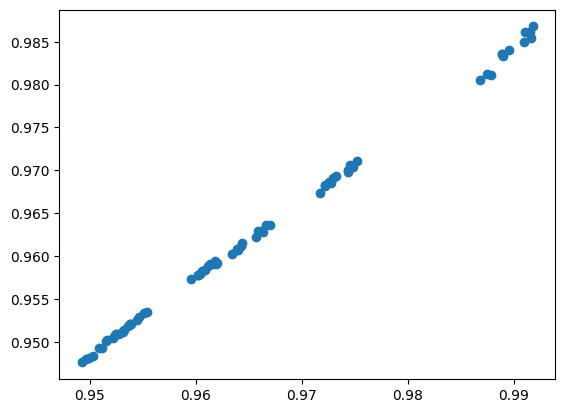

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(table["AUC Train"], table["AUC Test1"])

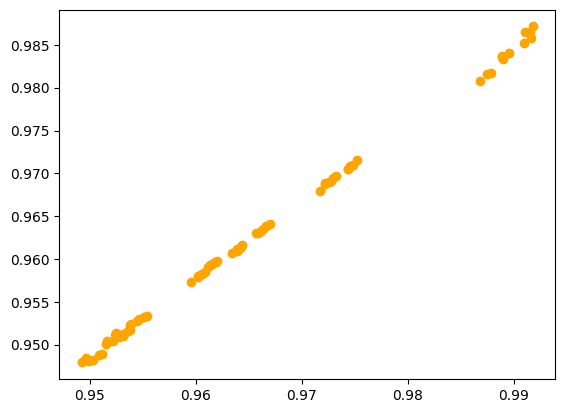

In [ ]:
plt.scatter(table["AUC Train"], table["AUC Test2"], color = 'orange')

In [ ]:
table.to_csv("drive/My Drive/Datasets/AUC_table_5.csv")


# Final Model

## Train

In [ ]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score

xgb_instance = xgb.XGBClassifier(n_estimators = 50, max_depth=4, learning_rate=0.01, subsample=0.5, colsample_bytree=0.5, scale_pos_weight=10)
model_final = xgb_instance.fit(X_train, Y_train)

In [ ]:
model_final_predict_proba_np = model_final.predict_proba(X_train)


In [ ]:
model_final_predict_proba_np_default = model_final_predict_proba_np[:,1]

In [ ]:
train["Prediction_Prob"] = model_final_predict_proba_np_default

<ipython-input-78-dde0df66843d>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train["Prediction_Prob"] = model_final_predict_proba_np_default


In [ ]:
train[["target", "Prediction_Prob",]].head(10)



,target,Prediction_Prob
202197,1.0,0.822237
156358,0.0,0.546509
250221,0.0,0.510752
270374,0.0,0.480219
15410,0.0,0.498473
79731,1.0,0.837055
203248,0.0,0.480140
123504,0.0,0.772854
34403,0.0,0.580082
261440,0.0,0.566206


## Test1

In [ ]:
model_final_predict_proba_np_t1 = model_final.predict_proba(X_test1)
model_final_predict_proba_np_default_t1 = model_final_predict_proba_np_t1[:,1]

In [ ]:
test1["Prediction_Prob"] = model_final_predict_proba_np_default_t1

<ipython-input-81-0ea33fba126d>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test1["Prediction_Prob"] = model_final_predict_proba_np_default_t1


## Test2

In [ ]:
model_final_predict_proba_np_t2 = model_final.predict_proba(X_test2)
model_final_predict_proba_np_default_t2 = model_final_predict_proba_np_t2[:,1]

In [ ]:
test2["Prediction_Prob"] = model_final_predict_proba_np_default_t2

<ipython-input-84-1eedf14b23b6>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test2["Prediction_Prob"] = model_final_predict_proba_np_default_t2


## Check rank ordering

In [ ]:
train["Prediction"] = model_final.predict_proba(X_train)[:, 1]

<Axes: xlabel='Score Bins'>

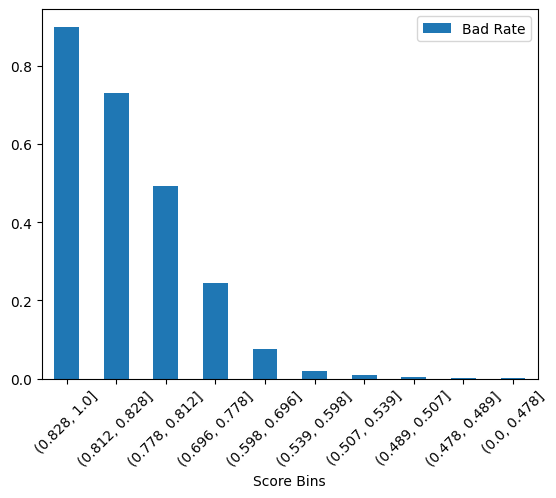

In [ ]:
# Rank Ordering
quantiles = list(set(train.Prediction.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
quantiles.sort()
quantiles.insert(0,0)
quantiles.insert(len(quantiles),1)


train["Score Bins"] = pd.cut(train["Prediction"], quantiles)
stat = train.groupby("Score Bins")["target"].agg(["sum", "count"])
stat["Bad Rate"] = stat["sum"] / stat["count"]
stat.sort_values(["Bad Rate"],ascending=False, inplace=True)

#plt.bar(stat["Bad Rate"], color ='maroon',
 #       width = 0.4)

stat.plot.bar(y='Bad Rate', rot=45)

<ipython-input-93-12d42337c750>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test1["Prediction"] = model_final.predict_proba(X_test1)[:, 1]
<ipython-input-93-12d42337c750>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test1["Score Bins"] = pd.cut(test1["Prediction"], quantiles)


<Axes: xlabel='Score Bins'>

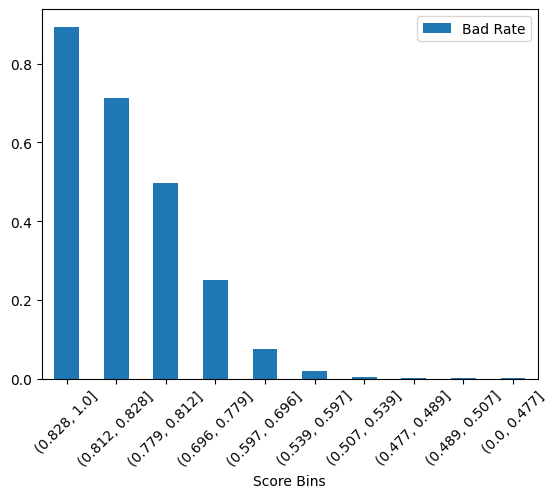

In [ ]:
test1["Prediction"] = model_final.predict_proba(X_test1)[:, 1]
quantiles = list(set(test1.Prediction.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
quantiles.sort()
quantiles.insert(0,0)
quantiles.insert(len(quantiles),1)


test1["Score Bins"] = pd.cut(test1["Prediction"], quantiles)
stat = test1.groupby("Score Bins")["target"].agg(["sum", "count"])
stat["Bad Rate"] = stat["sum"] / stat["count"]
stat.sort_values(["Bad Rate"],ascending=False, inplace=True)

#plt.bar(stat["Bad Rate"], color ='maroon',
 #       width = 0.4)

stat.plot.bar(y='Bad Rate', rot=45)

<ipython-input-94-495396411128>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test2["Prediction"] = model_final.predict_proba(X_test2)[:, 1]
<ipython-input-94-495396411128>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test2["Score Bins"] = pd.cut(test2["Prediction"], quantiles)


<Axes: xlabel='Score Bins'>

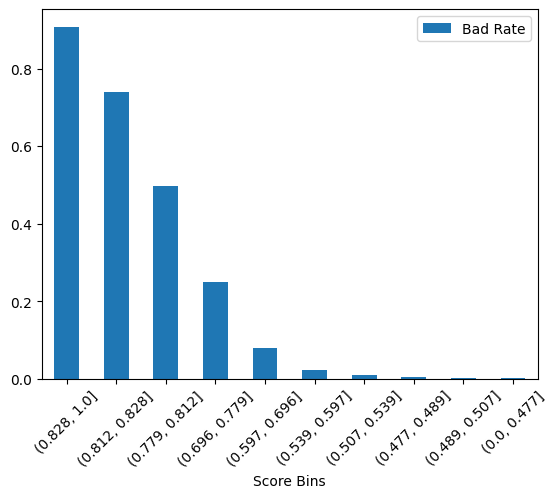

In [ ]:
test2["Prediction"] = model_final.predict_proba(X_test2)[:, 1]
quantiles = list(set(test1.Prediction.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
quantiles.sort()
quantiles.insert(0,0)
quantiles.insert(len(quantiles),1)


test2["Score Bins"] = pd.cut(test2["Prediction"], quantiles)
stat = test2.groupby("Score Bins")["target"].agg(["sum", "count"])
stat["Bad Rate"] = stat["sum"] / stat["count"]
stat.sort_values(["Bad Rate"],ascending=False, inplace=True)

#plt.bar(stat["Bad Rate"], color ='maroon',
 #       width = 0.4)

stat.plot.bar(y='Bad Rate', rot=45)

## ROC Curves

In [ ]:
import sklearn.metrics as metrics

In [ ]:
import matplotlib.pyplot as plt

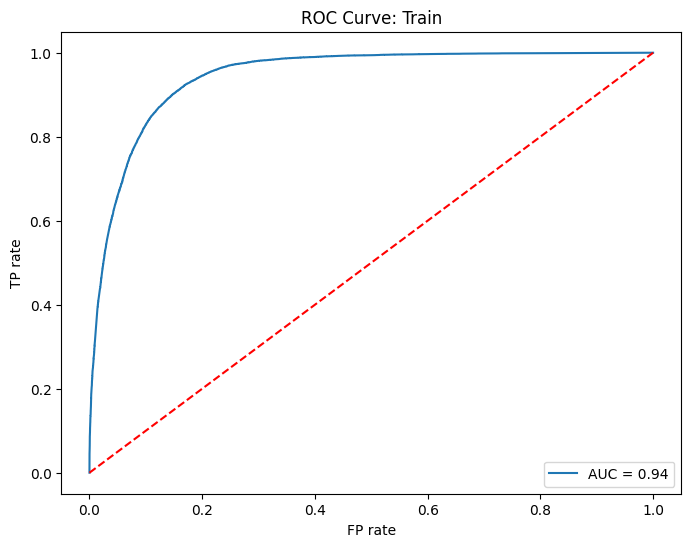

In [ ]:
fp_r, tp_r, t = metrics.roc_curve(Y_train, model_final_predict_proba_np_default)
auc = metrics.auc(fp_r, tp_r)
plt.figure(figsize=(8, 6))
plt.plot(fp_r, tp_r, label="AUC = %.2f" % auc)
plt.plot([0,1],[0,1],"r--")
plt.ylabel("TP rate")
plt.xlabel("FP rate")
plt.legend(loc=4)
plt.title("ROC Curve: Train")
plt.show()

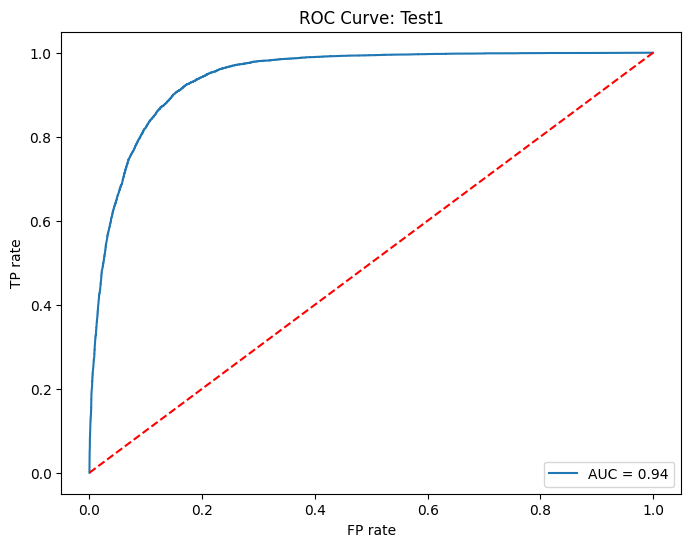

In [ ]:
fp_r, tp_r, t = metrics.roc_curve(Y_test1, model_final_predict_proba_np_default_t1)
auc = metrics.auc(fp_r, tp_r)
plt.figure(figsize=(8, 6))
plt.plot(fp_r, tp_r, label="AUC = %.2f" % auc)
plt.plot([0,1],[0,1],"r--")
plt.ylabel("TP rate")
plt.xlabel("FP rate")
plt.legend(loc=4)
plt.title("ROC Curve: Test1")
plt.show()

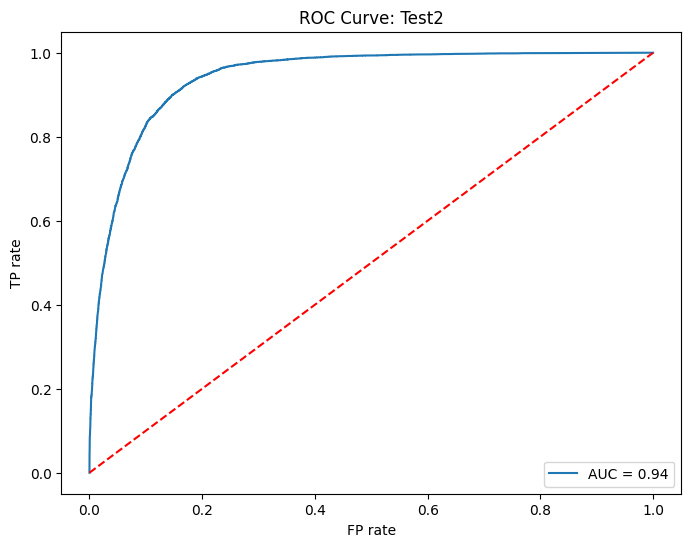

In [ ]:
fp_r, tp_r, t = metrics.roc_curve(Y_test2, model_final_predict_proba_np_default_t2)
auc = metrics.auc(fp_r, tp_r)
plt.figure(figsize=(8, 6))
plt.plot(fp_r, tp_r, label="AUC = %.2f" % auc)
plt.plot([0,1],[0,1],"r--")
plt.ylabel("TP rate")
plt.xlabel("FP rate")
plt.legend(loc=4)
plt.title("ROC Curve: Test2")
plt.show()

## Threshold Optimization

In [ ]:
t_opt_idx = np.argmax(tp_r - fp_r)
t_opt = t[t_opt_idx]
print("Threshold value is: %.2f" % t_opt)

Threshold value is: 0.74


Text(0.5, 0.98, 'Impact of threshold adjustment on the error matrix')

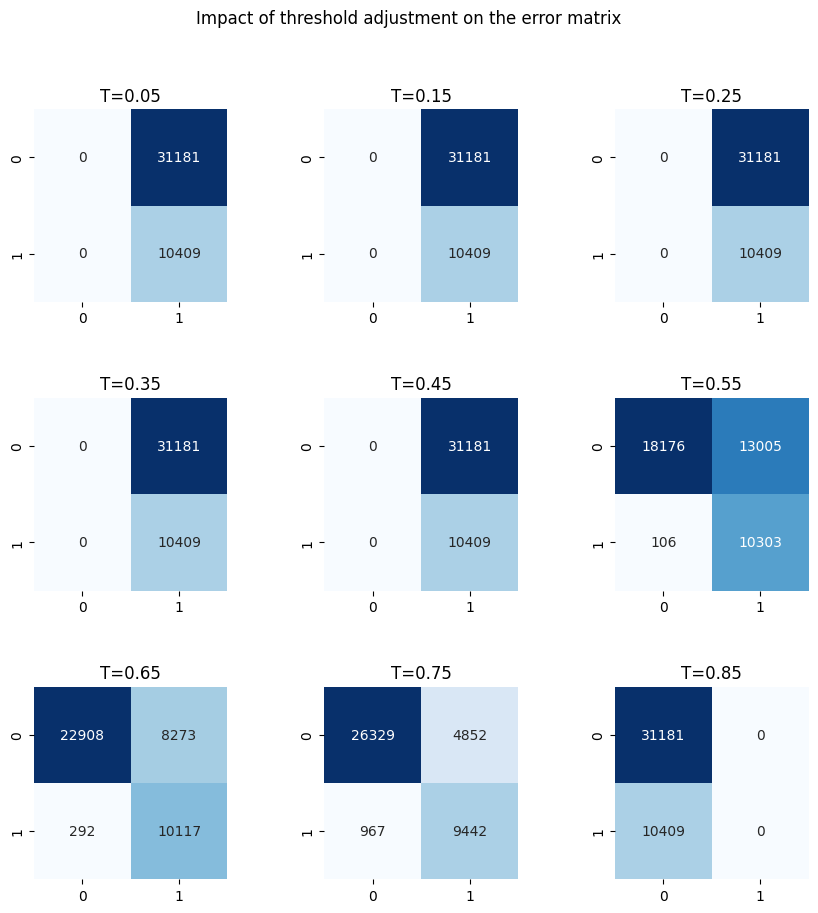

In [ ]:
import seaborn as sns
fig, axes = plt.subplots(3,3, figsize=(10,10))

for t, ax in enumerate(axes.flat):
    threshold = (t+0.5)/10

    t2_predict_int = (model_final_predict_proba_np_default_t2 > threshold).astype(int)
    c_matrix = metrics.confusion_matrix(Y_test2, t2_predict_int)
    sns.heatmap(c_matrix, annot=True, cmap="Blues", fmt="d", ax=ax, cbar=False)
    ax.title.set_text("T=%.2f" % threshold)

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.suptitle("Impact of threshold adjustment on the error matrix")

## SHAP Values

In [ ]:
pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 10.3 MB/s eta 0:00:00


In [ ]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [ ]:
explainer = shap.Explainer(model_final, X_test2)
shap_values = explainer(X_test2)

[16:43:20] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
 99%|===================| 41348/41590 [00:34<00:00]       

### Beeswarm

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


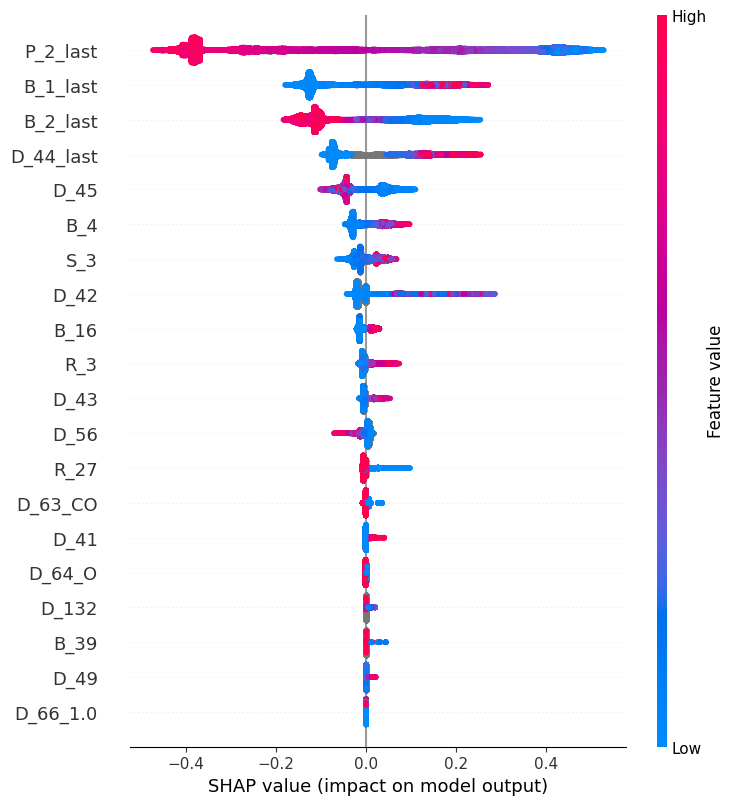

In [ ]:
shap.plots.beeswarm(shap_values, max_display=20)


### Waterfall

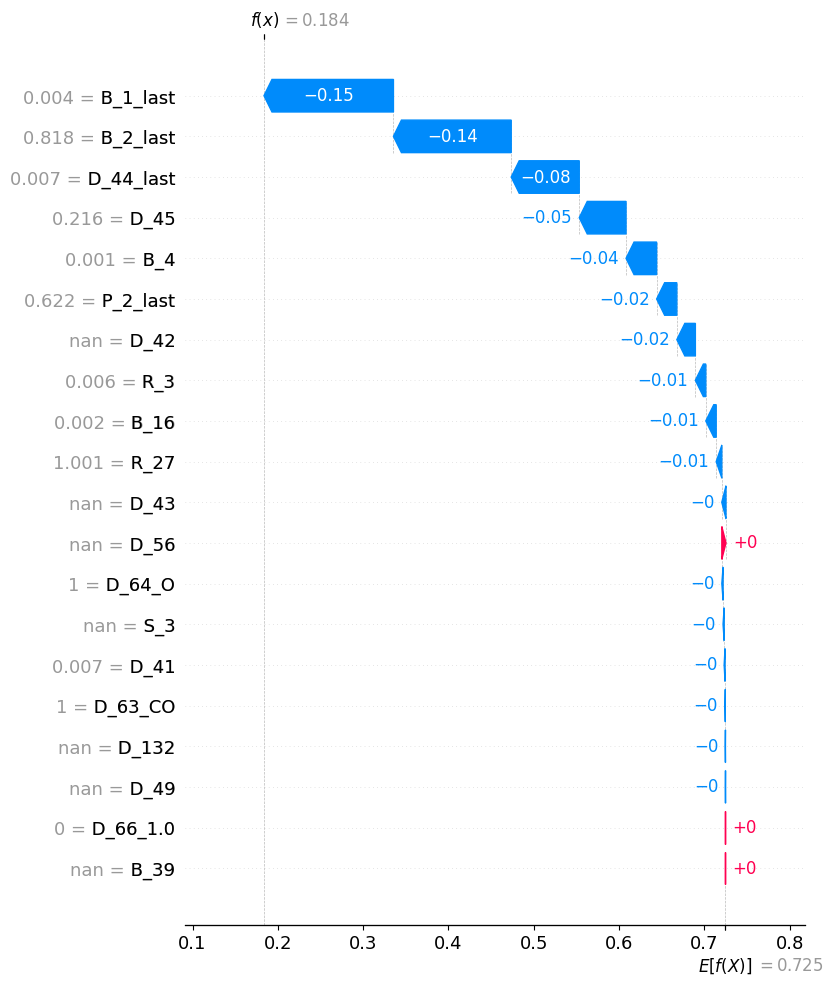

In [ ]:
shap.plots.waterfall(shap_values[0], max_display=20)


## Save Final Model

In [ ]:
model_final.save_model('XGB_model_final.json')

In [ ]:
# B_5/ S_3